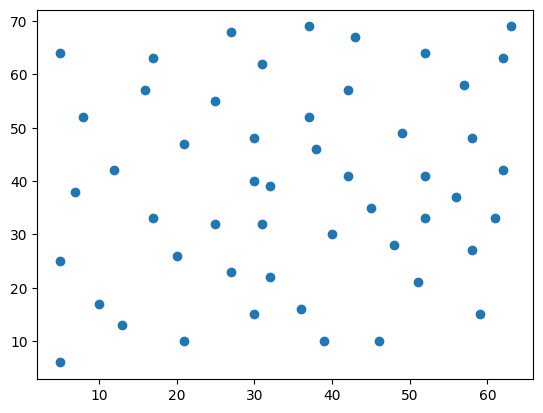

In [5]:
# Reading file

import numpy as np
import matplotlib.pyplot as plt

class City:
    id: int
    x: float
    y: float

    def __init__(self, id, x, y):
        self.x = float(x)
        self.y = float(y)
        self.id = int(id)

file_name = "eil51.tsp.txt"
intro_lines = 6         # MAKE THEM CONSTANT
cities_amount = 51     # MAKE THEM CONSTANT

cities = []
with open(file_name,"r") as f:
    for i in range(intro_lines):
        f.readline()
    for i in range(cities_amount):
        line = f.readline()
        id, x, y = line.split()
        cities.append(City(id, x, y))

coordinates_x = []
coordinates_y = []
for City in cities:
    coordinates_x.append(City.x)
    coordinates_y.append(City.y)
plt.scatter(coordinates_x, coordinates_y)

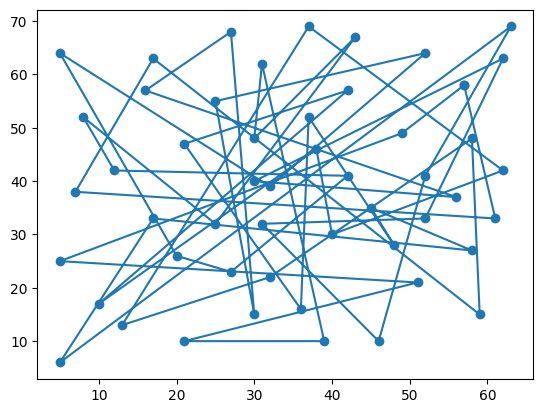

True
576.97350671063
585.364127259605


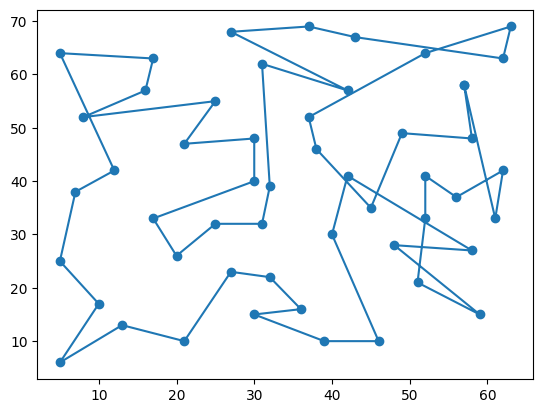

In [62]:
import copy

class Path:
    city_ids = []

    def __init__(self, city_ids = []):
        self.city_ids = copy.deepcopy(city_ids)



# Evaluate Path (Fitness function)
    # Euclidean distance
    def eval_distance(self):
        distance = 0

        for i in range(len(self.city_ids)-1):            
            # Because cities ids are starting from 1, and array starts at 0
            distance += np.sqrt(
            (cities[self.city_ids[i+1]-1].x - cities[self.city_ids[i]-1].x)**2 + 
            (cities[self.city_ids[i+1]-1].y - cities[self.city_ids[i]-1].y)**2 )
        return distance

# Path is invalid if returned to non starting location at the end
    def eval_validity(self):
        if self.city_ids[0] == self.city_ids[-1]:
            return True
        else: return False

# Visualize Path
    def visualize(self):
        coordinates_x = []
        coordinates_y = []
        for i in self.city_ids:
            coordinates_x.append(cities[i-1].x)       # Because cities ids are starting from 1, and array starts at 0
            coordinates_y.append(cities[i-1].y)
        plt.scatter(coordinates_x, coordinates_y)
        plt.plot(coordinates_x, coordinates_y)
        plt.show()
    def visualize_print(self):
        print(self.city_ids)



    # Rand Permutations, k is amount of swaps
    def generate_new_path_random_swapping(self, k):
        city_ids_new = copy.deepcopy(self.city_ids)

        ids_to_swap = np.random.randint(1, len(self.city_ids)-1, k*2)   # We are not swapping start and end
        ids_to_swap.sort()

        for j in range(0, k, 2):
            city_ids_new[ids_to_swap[j]], city_ids_new[ids_to_swap[j+1]] = city_ids_new[ids_to_swap[j+1]], city_ids_new[ids_to_swap[j]]
        return Path(city_ids_new)
    
    def generate_new_path_insertting(self, k):
        city_ids_new = copy.deepcopy(self.city_ids)

        ids_to_swap = np.random.randint(1, len(self.city_ids)-1, k*2)   # We are not swapping start and end
        ids_to_swap.sort()

        for j in range(0, k, 2):
            # Saving Value
            insert_value = city_ids_new[ids_to_swap[j+1]]
            # Shifting
            city_ids_new[ids_to_swap[j]+1:ids_to_swap[j+1]+1] = city_ids_new[ids_to_swap[j]:ids_to_swap[j+1]] 
            # Inserting
            city_ids_new[ids_to_swap[j]] = insert_value
        return Path(city_ids_new)
    
    def generate_new_path_k_opt(self, k):
        city_ids_new = copy.deepcopy(self.city_ids)

        ids_to_swap = np.random.randint(1, len(self.city_ids)-1, k)   # We are not swapping start and end
        ids_to_swap.sort()

        for j in range(k-1):
            city_ids_new[ids_to_swap[j]:ids_to_swap[j+1]] = reversed(city_ids_new[ids_to_swap[j]:ids_to_swap[j+1]])
        return Path(city_ids_new)
                



















# Simplest way to create initial guess is just to shuffle
import random
random.seed(42)
shuffled = sorted(cities, key=lambda k: random.random())
shuffled.append(shuffled[0])    # So that path is cycle
city_ids_init_path = []
for city in shuffled:
    city_ids_init_path.append(city.id)


initial_path = Path(city_ids_init_path)
#print(initial_path.eval_validity())     # If everything is ok it should be True
#print(initial_path.eval_distance())     # Evaluate circuit size
initial_path.visualize()                # And see it
#initial_path.visualize_print()



















iterative = False
if iterative:
    # Random Permutations to find the better path
    path = initial_path
    for i in range(200_000):
        #new_path = path.generate_new_path_random_swapping(k=1) # k = Amount of swaps
        #new_path = path.generate_new_path_insertting(k=1)      # k = Amount of inserts
        new_path = path.generate_new_path_k_opt(k=2)           # k = amount of rewires
        if new_path.eval_distance() < path.eval_distance():
            path = new_path

    print(path.eval_validity())     # If everything is ok it should be True
    print(path.eval_distance())     # Evaluate circuit size
    path.visualize()                # And see it
    #path.visualize_print()



# Annealing

# begin optimizing
best_path = initial_path
current_path = initial_path
current_energy = initial_path.eval_distance()

# Annealing

temp_max = initial_path.eval_distance()/cities_amount   # Average path in initial solution
temp_min = 0
temp_current = temp_max

step = 0
step_max = 50_000

# Annealing Cooling Schedules
# http://what-when-how.com/artificial-intelligence/a-comparison-of-cooling-schedules-for-simulated-annealing-artificial-intelligence/
def cool_lin_m():
    return temp_max /  (1 + alpha * step)           # linear multiplicative cooling
def cool_lin_a():
    return temp_min + (temp_max - temp_min) * ((step_max - step)/step_max)  # linear additive cooling
def cool_quad_m():
    return temp_min / (1 + alpha * step**2)         # quadratic multiplicative cooling
def cool_quad_a():
    return temp_min + (temp_max - temp_min) * ((step_max - step)/step_max)**2   # quadratic additive cooling
def cool_exp_m():
    return temp_max * alpha**step                   # exponential multiplicative cooling
def cool_log_m():
    return temp_max / (alpha * np.log(step + 1))    # logarithmical multiplicative cooling




while step < step_max:
    
    step += 1

    # Get candidate solution
    #candidate_path = current_path.generate_new_path_random_swapping(k=1) # k = Amount of swaps
    #candidate_path = current_path.generate_new_path_insertting(k=1)      # k = Amount of inserts
    candidate_path = current_path.generate_new_path_k_opt(k=2)           # k = amount of rewires

    candidate_energy = candidate_path.eval_distance()

    delta_energy = candidate_energy - current_energy    # Positive if solution is better, and is always accepted
    if delta_energy < 0:
        best_path = candidate_energy

    if np.random.random() < np.exp(-delta_energy / temp_current):
        current_energy = candidate_energy
        current_path = candidate_path
    
    #temp_current = temp_min + (temp_max - temp_min) * ((step_max - step)/step_max)     # linear additive cooling
    alpha = 0.8
    temp_current = cool_log_m()
    # Implement cooling functions here
    #print(temp_current)


# generate some final stats
#self.acceptance_rate = self.accept / self.step
print(path.eval_validity())     # If everything is ok it should be True
print(best_path)     # Evaluate circuit size
print(current_path.eval_distance())     # Evaluate circuit size
current_path.visualize()                # And see it


# Future Discussions and further optimizations

 PreCalculate Distance between all cities and use lookup table